<a href="https://colab.research.google.com/github/NarendranathChakraborty/Crop-Prediction/blob/main/Crop%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns", None)
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/Crop_recommendation.csv')

### ***Data Analysis : EDA***

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.size

17600

In [ ]:
df.shape

(2200, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

### **Graphs to Analyse the data**

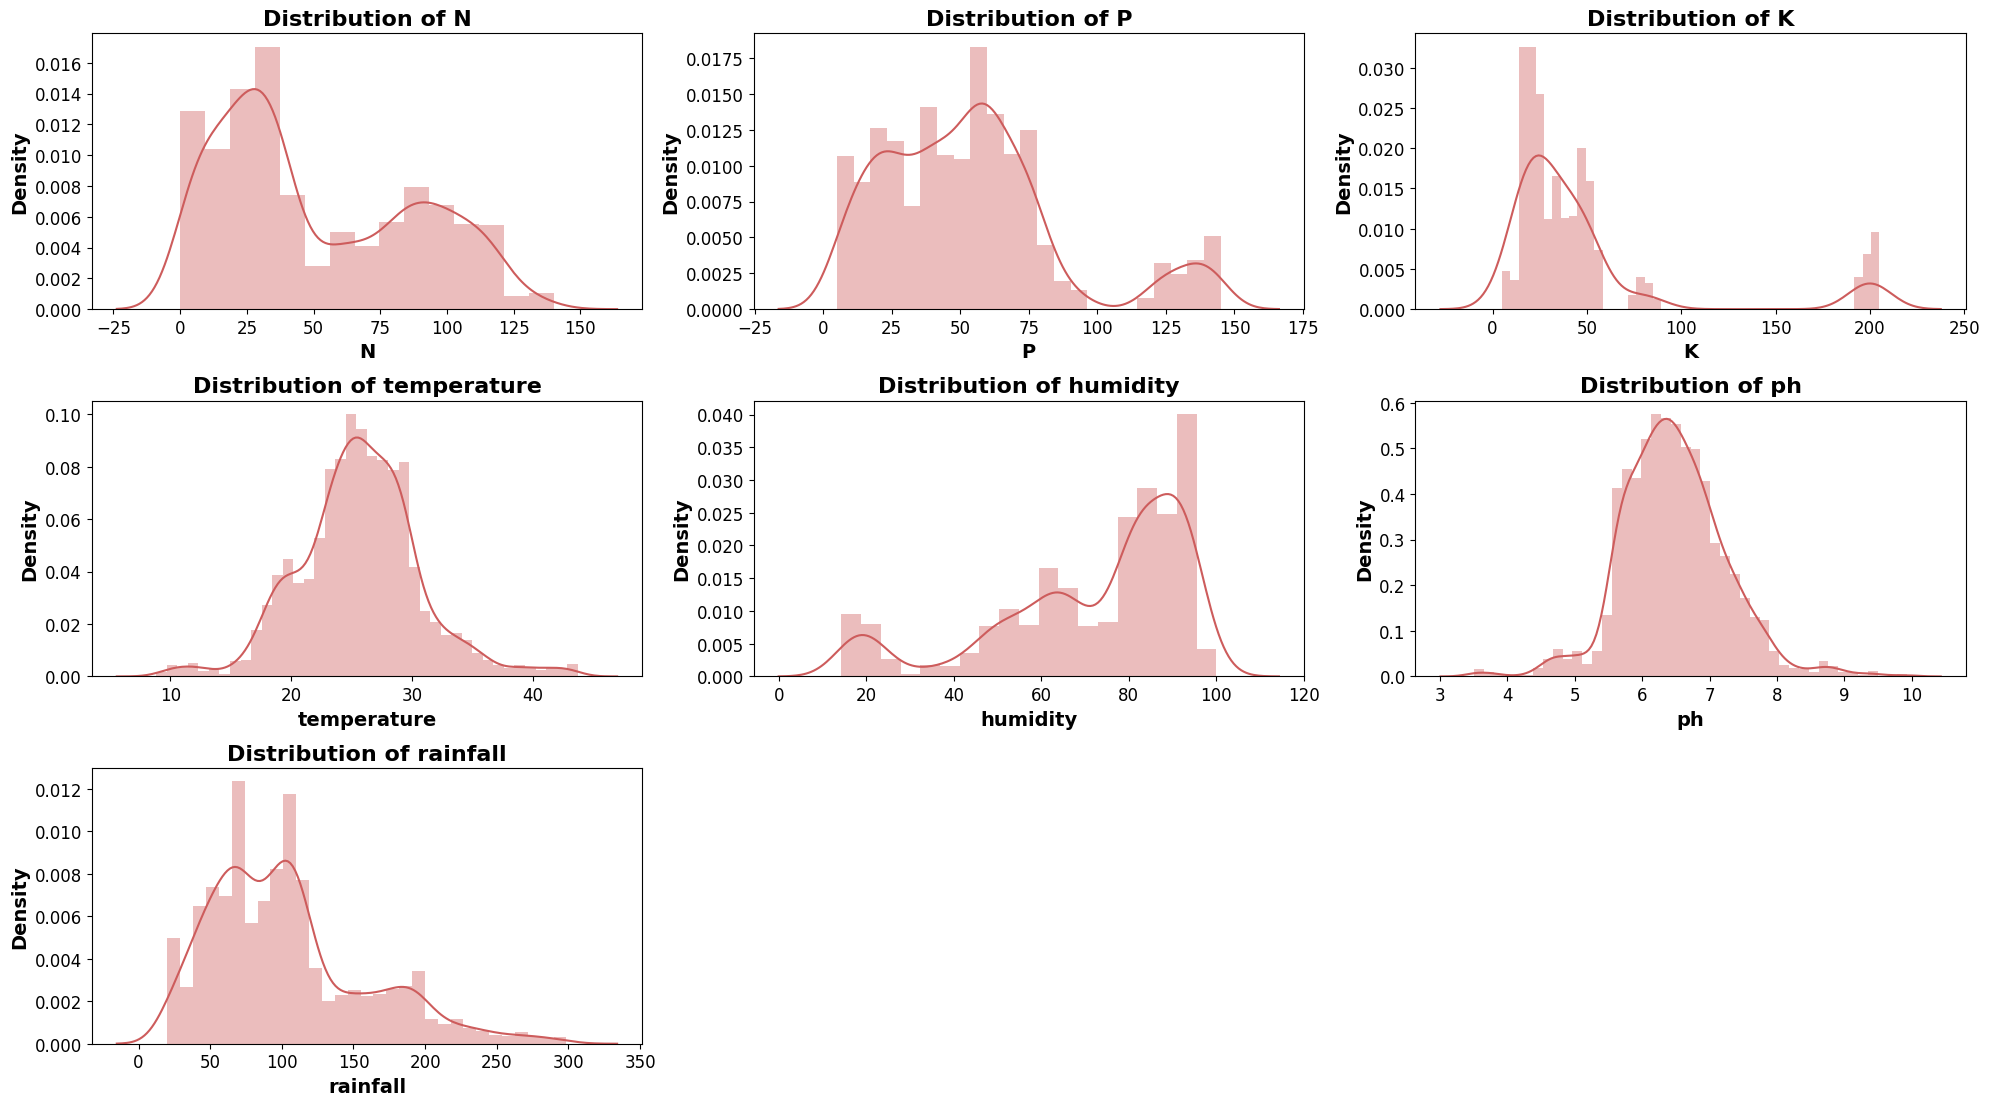

In [ ]:

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

plt.figure(figsize=(20, 220))  # Increase the figure size

for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold', fontsize=14)
    plt.ylabel('Density', weight='bold', fontsize=14)  # Increase the font size
    plt.xticks(fontsize=12)  # Increase the font size of tick labels on x-axis
    plt.yticks(fontsize=12)  # Increase the font size of tick labels on y-axis
    plt.title(f'Distribution of {col}', weight='bold', fontsize=16)  # Increase the font size
    plt.tight_layout()

plt.show()


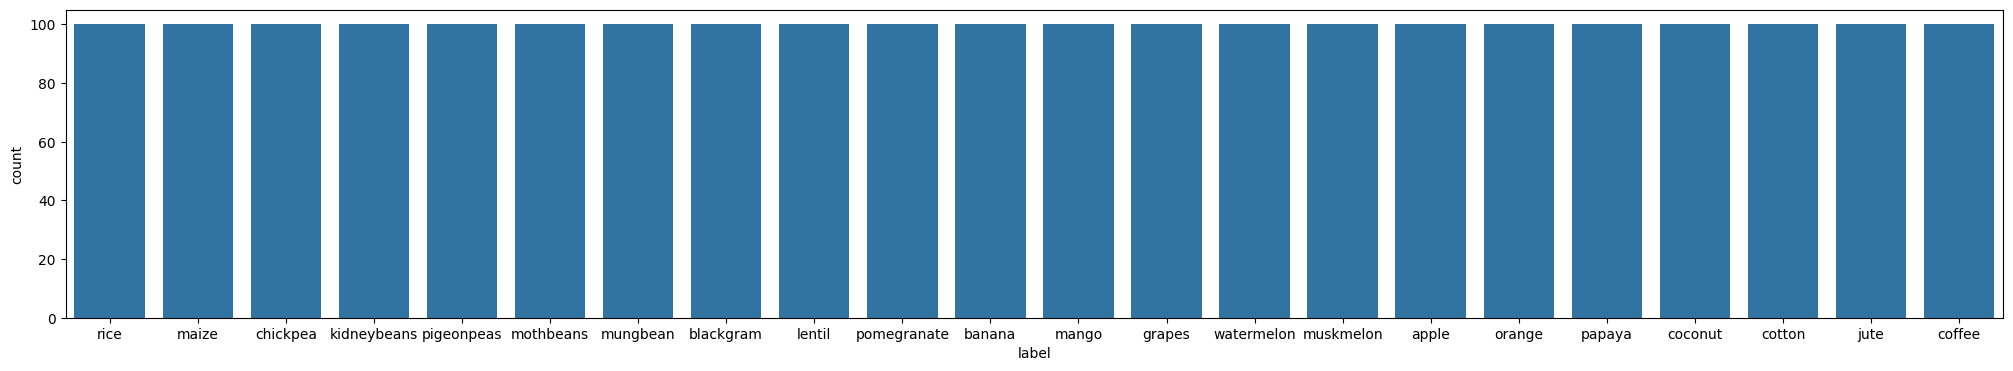

In [ ]:
plt.figure(figsize=(25, 4))
sns.countplot(x=df["label"])
plt.show();

### **KDE Plot** || **Violin Plot** || **Box Plot**


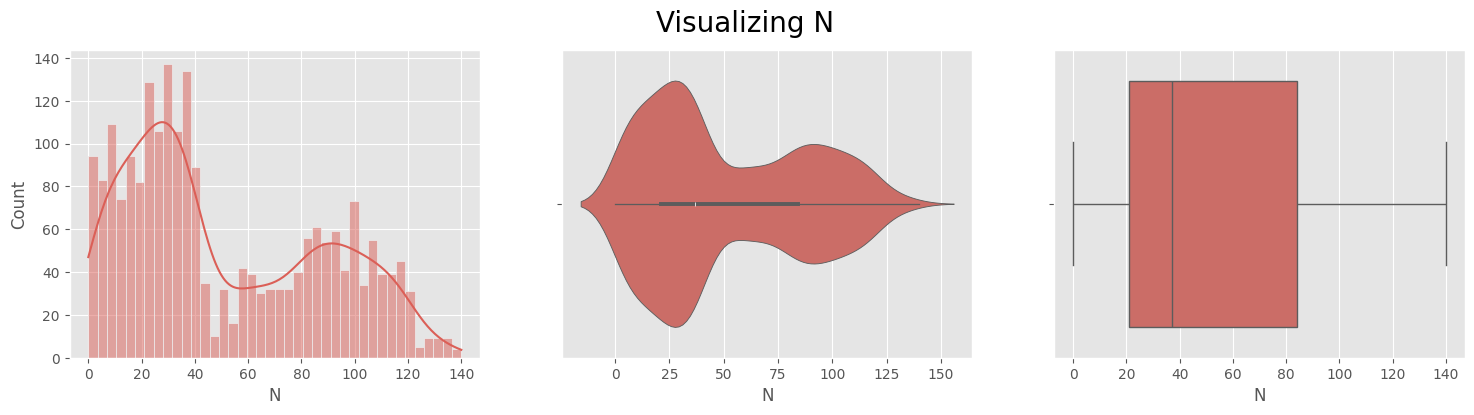

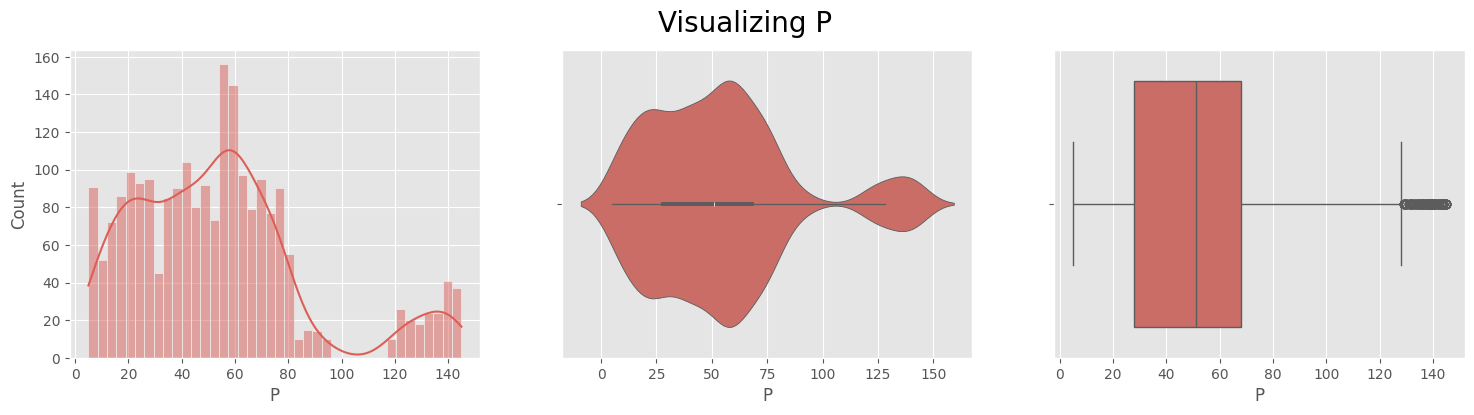

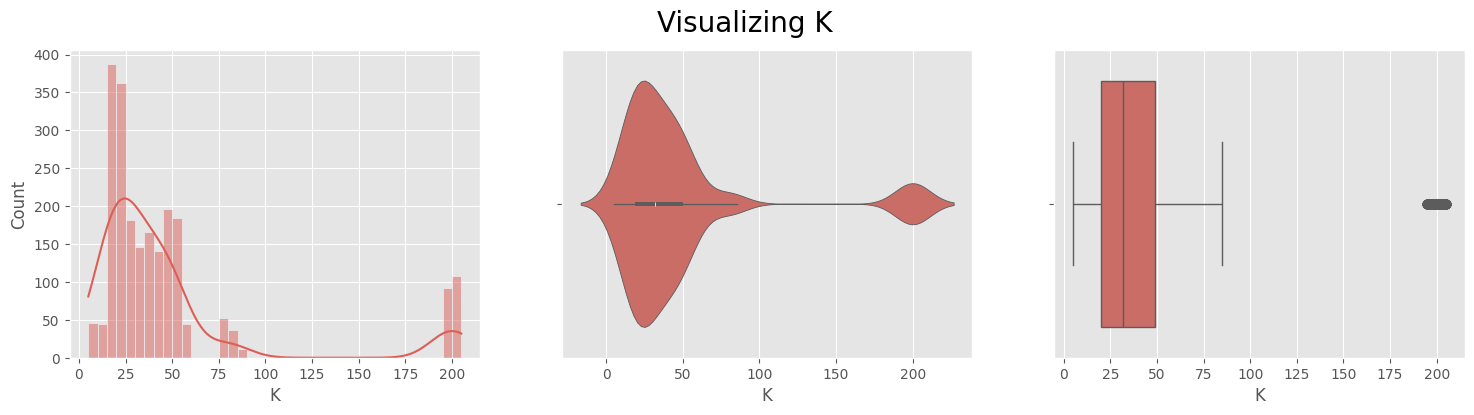

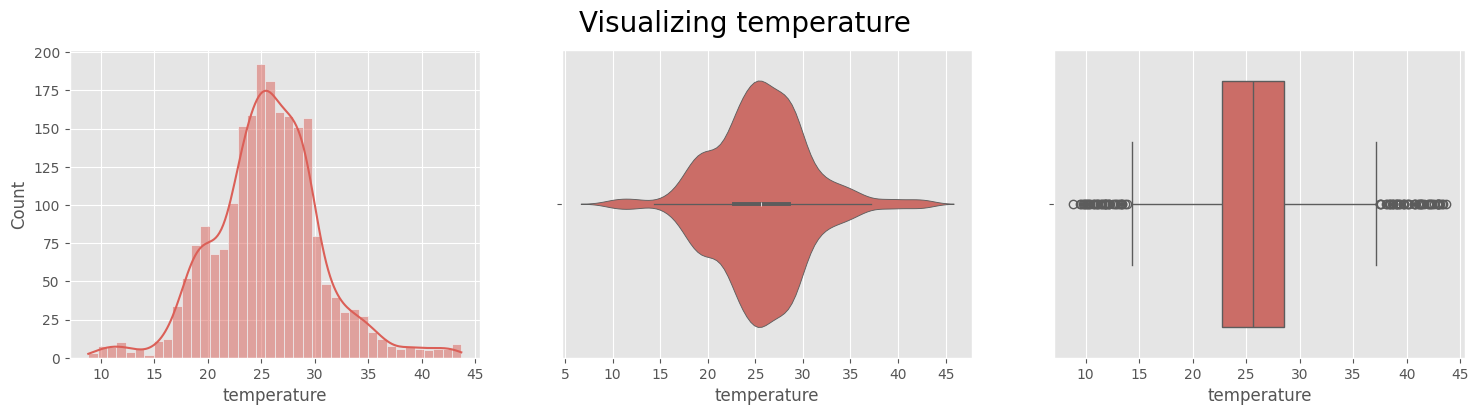

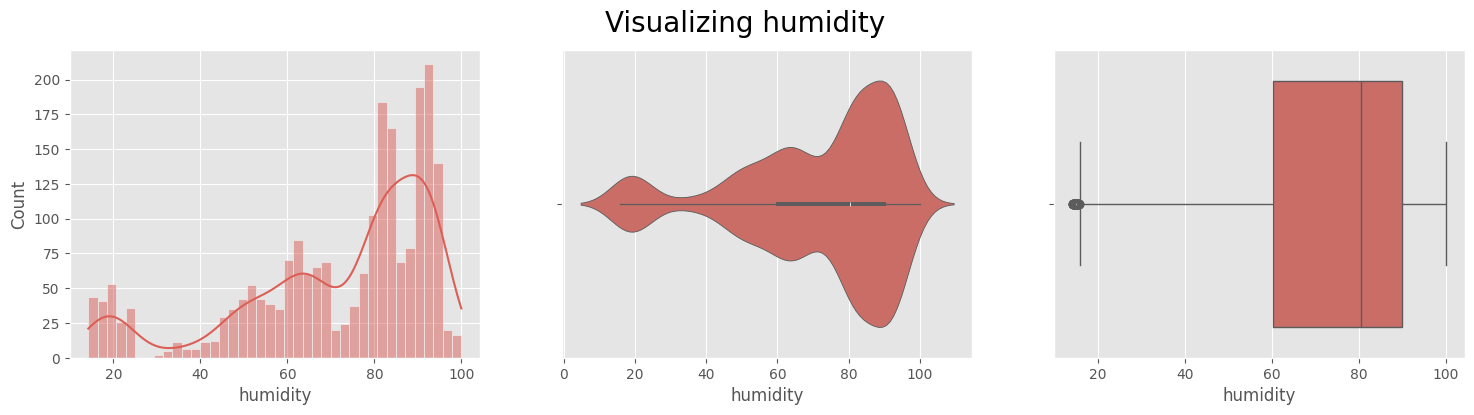

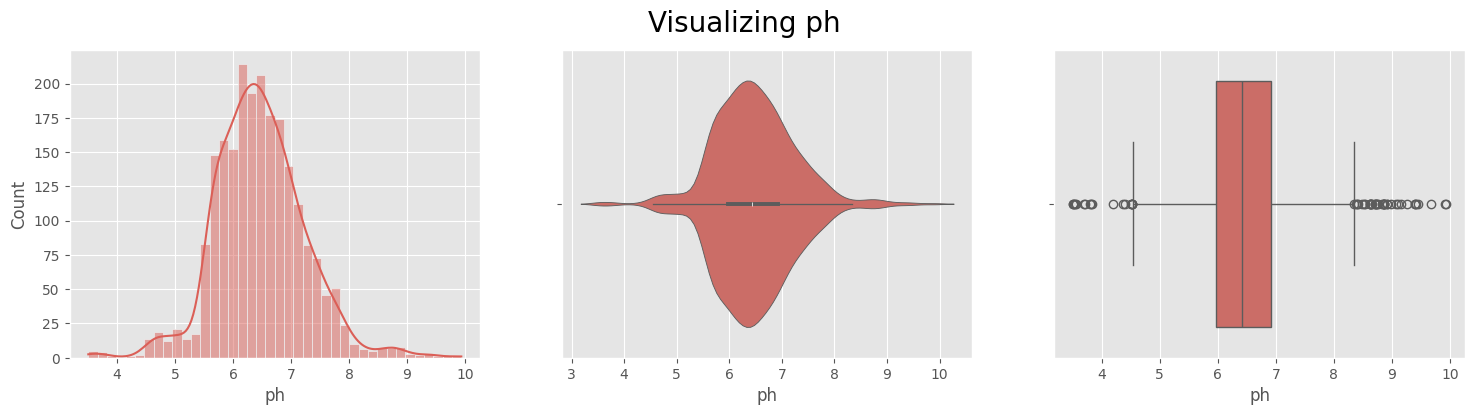

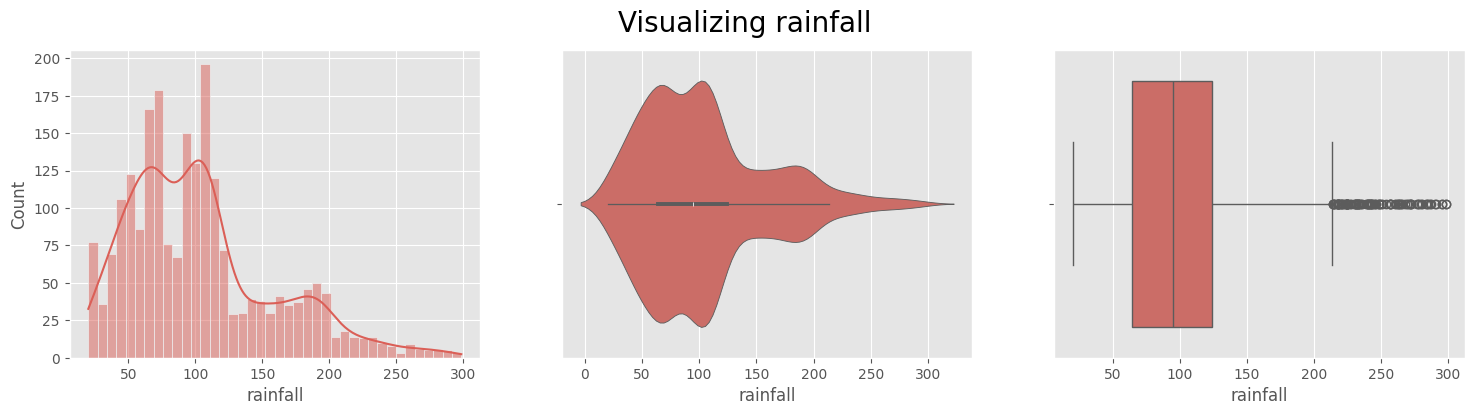

In [ ]:
plt.style.use('ggplot')
sns.set_palette("hls", 8)
for i in df.columns[:-1]:
    fig,ax=plt.subplots(1,3,figsize=(18,4))
    sns.histplot(data=df,x=i,kde=True,bins=40,ax=ax[0])
    sns.violinplot(data=df,x=i,ax=ax[1])
    sns.boxplot(data=df,x=i,ax=ax[2])
    plt.suptitle(f'Visualizing {i}',size=20)

### **Heatmap**

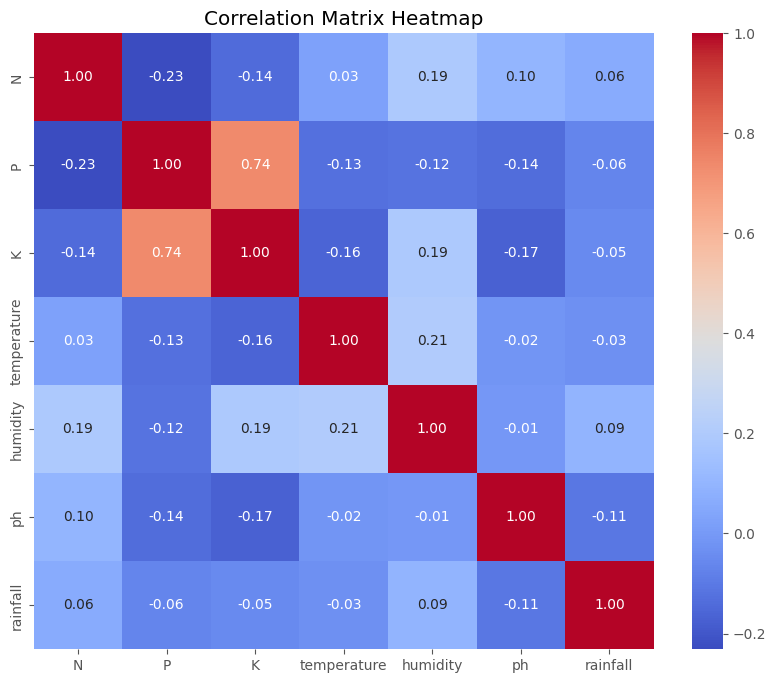

In [ ]:
# Exclude non-numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


### **Pairplot**

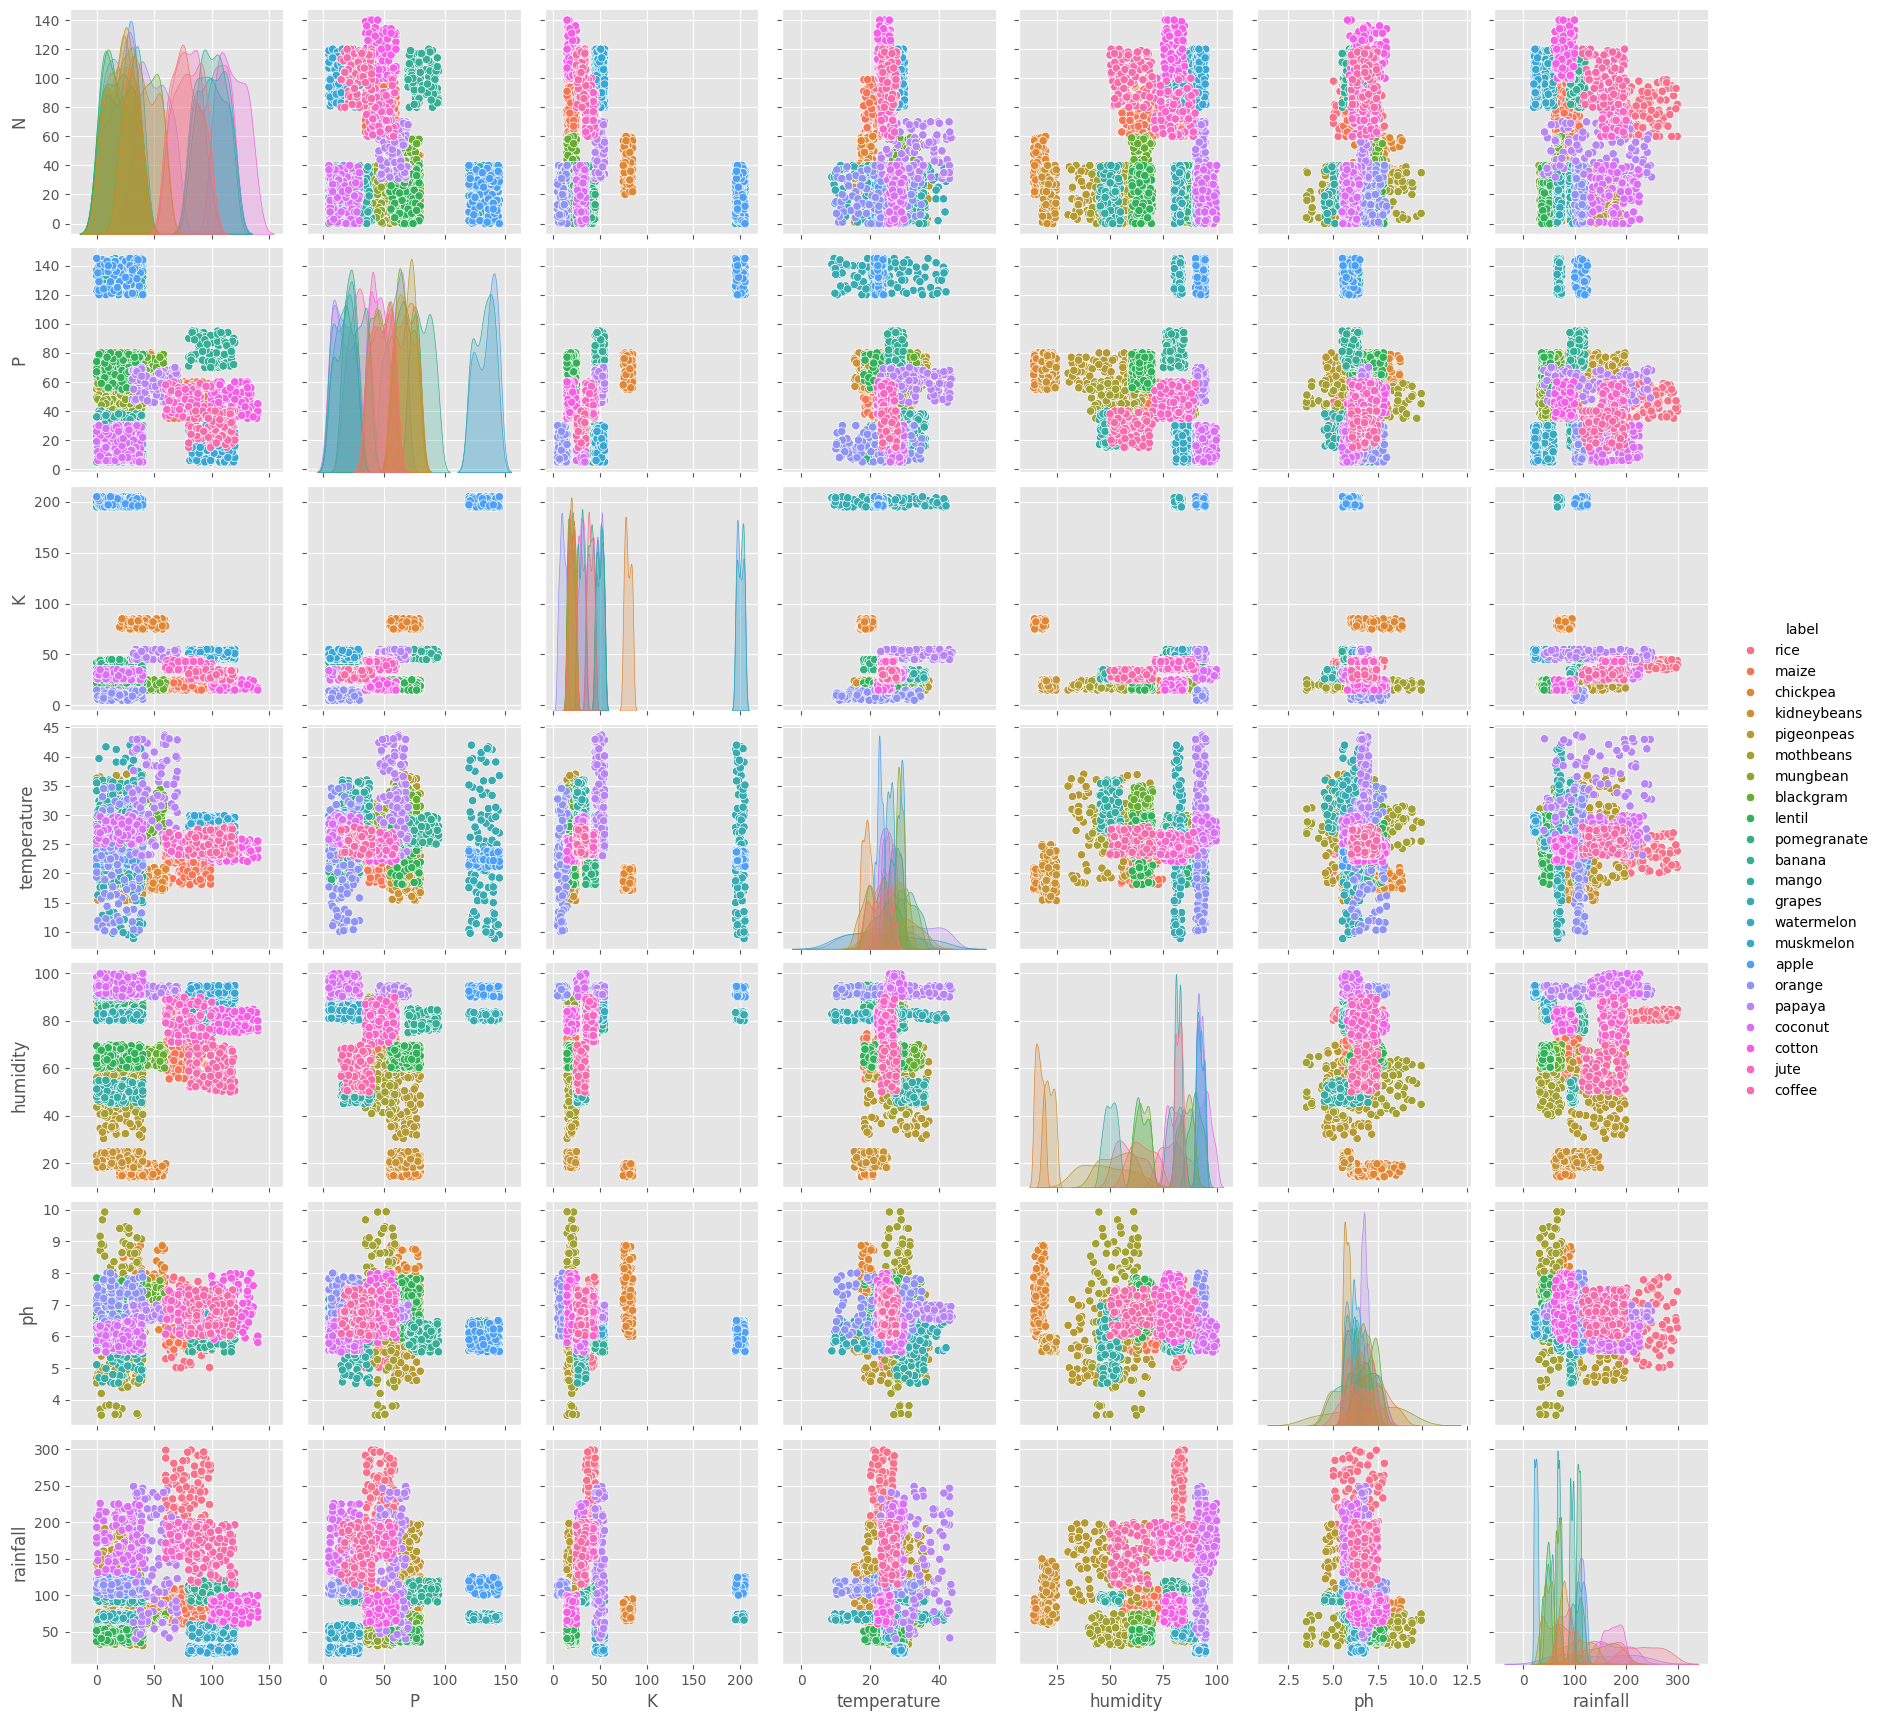

In [ ]:
sns.pairplot(data=df,hue='label')
plt.show()



## **Seperating features and target label**

In [ ]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [ ]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

## **Splitting the data into training and testing sets**

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

## **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

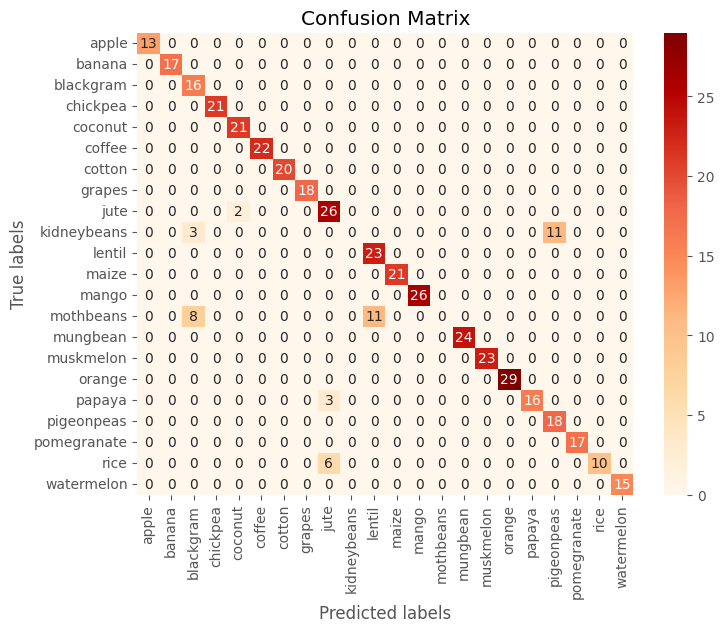

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Ytest, predicted_values)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="OrRd", fmt="d", xticklabels=np.unique(Ytest), yticklabels=np.unique(Ytest))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)
score


array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

## **Guassian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming Xtrain, Ytrain, Xtest, Ytest are your training and test data

# Initialize and train Naive Bayes classifier
NaiveBayes = GaussianNB()
NaiveBayes.fit(Xtrain, Ytrain)

# Make predictions
predicted_values = NaiveBayes.predict(Xtest)

# Calculate accuracy and append to acc list
x = accuracy_score(Ytest, predicted_values)
acc.append(x)

# Append model name to the model list
model.append('Naive Bayes')

# Print accuracy and classification report
print("Naive Bayes's Accuracy is:", x)
print(classification_report(Ytest, predicted_values))



Naive Bayes's Accuracy is: 0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00   

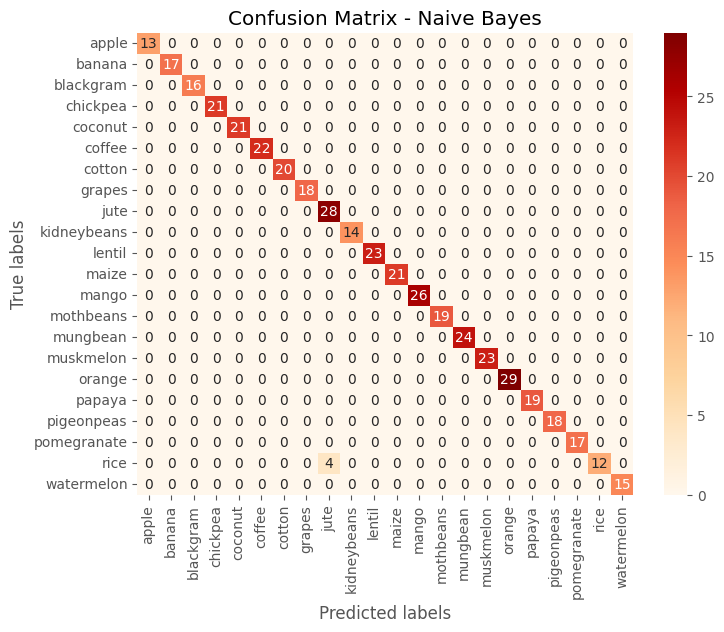

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate confusion matrix
cm = confusion_matrix(Ytest, predicted_values)

# Plot confusion matrix for Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="OrRd", fmt="d", xticklabels=np.unique(Ytest), yticklabels=np.unique(Ytest))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


In [ ]:
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

## **Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import SVC

SVM = SVC()

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9772727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.85      1.00      0.92        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.92      1.00      0.96        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.84      0.91        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

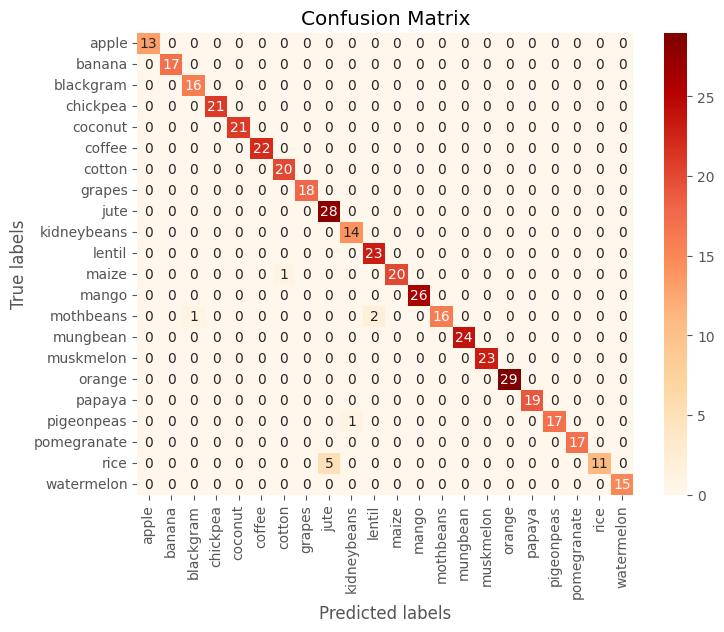

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Ytest, predicted_values)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="OrRd", fmt="d", xticklabels=np.unique(Ytest), yticklabels=np.unique(Ytest))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.98409091, 0.97954545, 0.97954545, 0.97272727, 0.975     ])

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

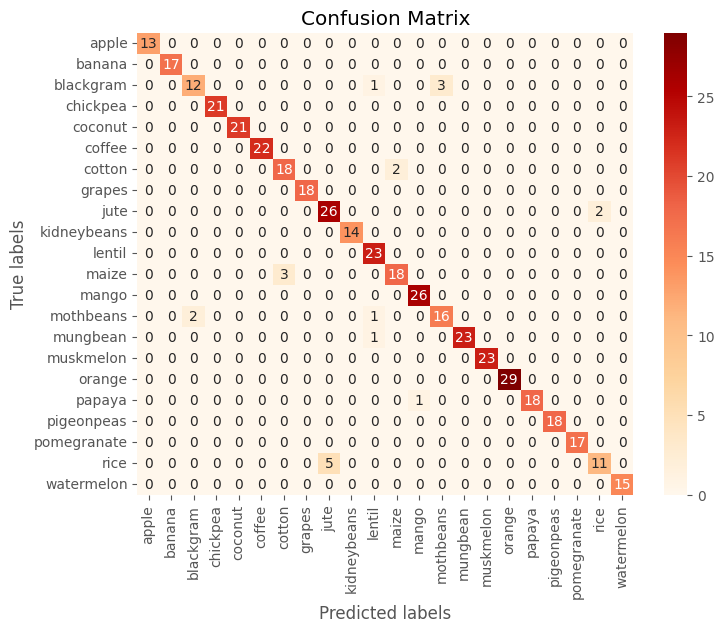

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Ytest, predicted_values)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="OrRd", fmt="d", xticklabels=np.unique(Ytest), yticklabels=np.unique(Ytest))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

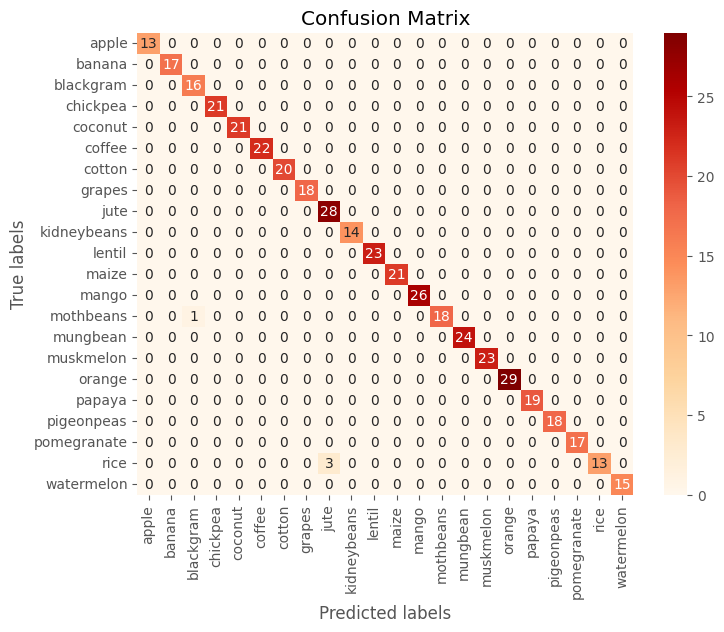

In [ ]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Ytest, predicted_values)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="OrRd", fmt="d", xticklabels=np.unique(Ytest), yticklabels=np.unique(Ytest))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

## **Accuracy of each model**

In [ ]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9
Naive Bayes --> 0.990909090909091
SVM --> 0.9772727272727273
Logistic Regression --> 0.9522727272727273
RF --> 0.990909090909091


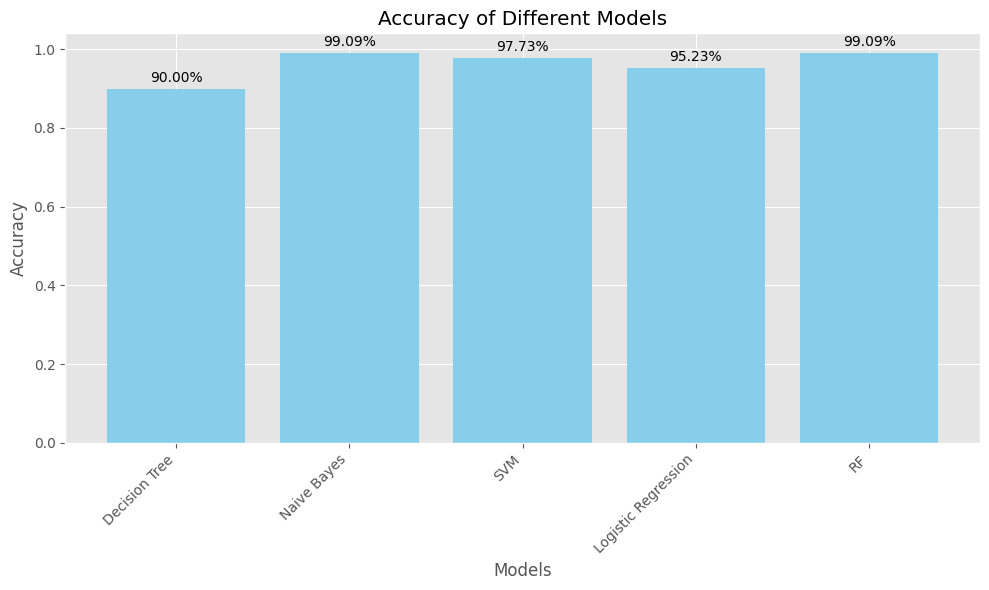

In [ ]:
import matplotlib.pyplot as plt

# Assuming accuracy_models is a dictionary containing model names as keys and corresponding accuracies as values

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(accuracy_models.keys(), accuracy_models.values(), color='skyblue')

# Adding percentage annotations on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval*100:.2f}%', ha='center', va='bottom', fontsize=10)

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Displaying the plot
plt.show()


# **Hyperparameter Tuning for Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np


# Define the parameter grid for Randomized Search
param_grid = {
    'n_estimators': np.arange(50, 200),
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(2, 25),
    'min_samples_split': np.arange(2, 25),
    'min_samples_leaf': np.arange(2, 25)
}

# Initialize Random Forest Classifier
rf = RandomForestClassifier()

# Initialize RandomizedSearchCV with the Random Forest classifier and parameter grid
rscv_model = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=100, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
rscv_model.fit(Xtrain, Ytrain)

# Get the best estimator (best model) from RandomizedSearchCV
best_estimator = rscv_model.best_estimator_

# Print the best parameters found by RandomizedSearchCV
print("Best Parameters:", rscv_model.best_params_)


Best Parameters: {'n_estimators': 113, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_depth': 8, 'criterion': 'entropy'}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

best_rf_model = RandomForestClassifier(n_estimators=192, min_samples_split=17, min_samples_leaf=2, max_depth=18, criterion='entropy', random_state=42)


In [ ]:
best_rf_model.fit(Xtrain, Ytrain)


RandomForestClassifier(criterion='entropy', max_depth=18, min_samples_leaf=2,
                       min_samples_split=17, n_estimators=192, random_state=42)

# **Training with the best parameters**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np

# Define the best hyperparameters
best_params = {
    'n_estimators': 192,
    'min_samples_split': 17,
    'min_samples_leaf': 2,
    'max_depth': 18,
    'criterion': 'entropy'
}

# Initialize the Random Forest classifier with the best hyperparameters
best_RF = RandomForestClassifier(**best_params, random_state=0)

# Train the Random Forest classifier using the best hyperparameters
best_RF.fit(Xtrain, Ytrain)

# Make predictions on the test set
predicted_values = best_RF.predict(Xtest)

# Calculate accuracy and append to the accuracy list
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)






RF's Accuracy is:  0.990909090909091


# **Succesfull Prediction using sample data**

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Sample input data
N = 200
P = 50.6
K = 0.29
temperature = 10.603016
humidity = 20.3
ph = 5
rainfall = 110.91

# Create a dictionary with feature names and values
input_data = {
    'N': N,
    'P': P,
    'K': K,
    'temperature': temperature,
    'humidity': humidity,
    'ph': ph,
    'rainfall': rainfall
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame([input_data])

# Extract feature names
feature_names = df.columns.tolist()

# Convert DataFrame to numpy array for prediction
data = df.values

# Make prediction using the trained RandomForestClassifier
prediction = RF.predict(data)
print(prediction)

['kidneybeans']


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Sample input data
N = 50
P = 100
K = 150
temperature = 25.603016
humidity = 60.3
ph = 5
rainfall = 110.91

# Create a dictionary with feature names and values
input_data = {
    'N': N,
    'P': P,
    'K': K,
    'temperature': temperature,
    'humidity': humidity,
    'ph': ph,
    'rainfall': rainfall
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame([input_data])

# Extract feature names
feature_names = df.columns.tolist()

# Convert DataFrame to numpy array for prediction
data = df.values

# Make prediction using the trained RandomForestClassifier
prediction = RF.predict(data)
print(prediction)


['grapes']


In [ ]:
import pickle

pickle_file_path = '/content/drive/My Drive/crop_prediction_model.pkl'

# Open the file in binary write mode ('wb') and dump the RF model into it
with open(pickle_file_path, 'wb') as f:
    pickle.dump(RF, f)


In [ ]:
!pip install flask-ngrok
!pip install pyngrok

# **Change Directory**

In [ ]:
cd/content/drive/MyDrive/Colab Notebooks/data/Flask-deploy-model

/content/drive/MyDrive/Colab Notebooks/data/Flask-deploy-model


# **Import Required Packages**

In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask, request, render_template_string
import pickle

# **Create Flask App**

In [ ]:
!ngrok authtoken 2fbc4yti3QB2SA8H3cHWfh1LwXm_6cvcq1QpaKfN4VfGVNtUQ

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from flask import Flask, render_template, request
import pickle
import numpy as np
import requests
from pyngrok import ngrok  # Import ngrok module
from flask import jsonify

app = Flask(__name__)

# Load the trained model from the pickle file
with open('crop_prediction_model.pkl', 'rb') as f:
    model = pickle.load(f)


def predict_crop(N, P, K, temperature, humidity, ph, rainfall):
    # Make prediction
    prediction = model.predict([[N, P, K, temperature, humidity, ph, rainfall]])
    return prediction[0]

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/favicon.ico')
def favicon():
    return '', 204

@app.route('/getprediction', methods=['POST'])
def getprediction():
    # Get input values from the form
    try:
        # Get input values from the form
        N = float(request.form.get('N', 0.0))  # Provide a default value of 0.0 if 'N' is missing or invalid
        P = float(request.form.get('P', 0.0))
        K = float(request.form.get('K', 0.0))
        temperature = float(request.form.get('temperature', 0.0))
        humidity = float(request.form.get('humidity', 0.0))
        ph = float(request.form.get('ph', 0.0))
        rainfall = float(request.form.get('rainfall', 0.0))

        # Make prediction
        prediction = predict_crop(N, P, K, temperature, humidity, ph, rainfall)

        # Return prediction result as JSON
        return jsonify({'output': 'Predicted Crop: {}'.format(prediction)})

        if image_data:
            return jsonify({'output': 'Predicted Crop: {}'.format(prediction), 'image': image_data})
        else:
            return jsonify({'output': 'Predicted Crop: {}'.format(prediction), 'error': 'Image not found for predicted crop'})

    except ValueError:
        return jsonify({'error': 'Invalid input data format'})
    except Exception as e:
        return jsonify({'error': 'Failed to make prediction'})

    # Return the prediction
    return render_template('index.html', output='Predicted Crop: {}'.format(prediction))

if __name__ == "__main__":
    # Connect ngrok tunnel
    ngrok_tunnel = ngrok.connect(5000)
    print('Public URL:', ngrok_tunnel.public_url)


# Keep the Flask app running
app.run()

Public URL: https://70f2-34-91-34-130.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [26/Apr/2024 08:50:42] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [26/Apr/2024 08:50:43] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [26/Apr/2024 08:50:44] "GET /favicon.ico HTTP/1.1" 204 -
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
INFO:werkzeug:127.0.0.1 - - [26/Apr/2024 08:50:51] "POST /getprediction HTTP/1.1" 200 -
